Exercise 3: Implementing K-Means Clustering
Objective: Apply K-Means clustering to a dataset.
Tasks:
Load a dataset (e.g., customer data or a toy dataset).
Use K-Means to group the data into clusters.
Visualize the clusters using a scatter plot.

In [139]:
import pandas as pd
dataset = pd.read_csv("fish_data.csv")
dataset.head()
#Kim Anita 22B030380

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


In [140]:
dataset.isnull().sum()
#Kim Anita 22B030380

species      0
length       0
weight       0
w_l_ratio    0
dtype: int64

In [141]:
dataset.duplicated().sum()
#Kim Anita 22B030380

109

In [142]:
dataset.drop_duplicates(inplace=True)
#Kim Anita 22B030380

In [143]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset[['length', 'weight', 'w_l_ratio']])
#Kim Anita 22B030380

In [144]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=9, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
dataset['Cluster'] = clusters
#Kim Anita 22B030380

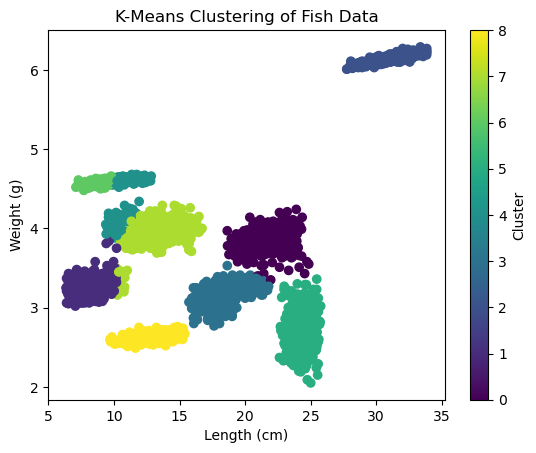

In [145]:
import matplotlib.pyplot as plt
plt.scatter(dataset['length'], dataset['weight'], c=dataset['Cluster'], cmap='viridis')
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.title('K-Means Clustering of Fish Data')
plt.colorbar(label='Cluster')
plt.show()
# #Kim Anita 22B030380

Exercise 4: Evaluating K-Means Clustering
Objective: Evaluate the quality of clustering results.
Tasks:
Calculate the inertia (sum of squared distances of samples to their closest cluster center).
Experiment with different numbers of clusters and plot the inertia to find the optimal number of clusters (Elbow Method).
Discuss the results.

In [146]:
inertia_values = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(scaled_data)  
    inertia_values.append(kmeans.inertia_)
# #Kim Anita 22B030380

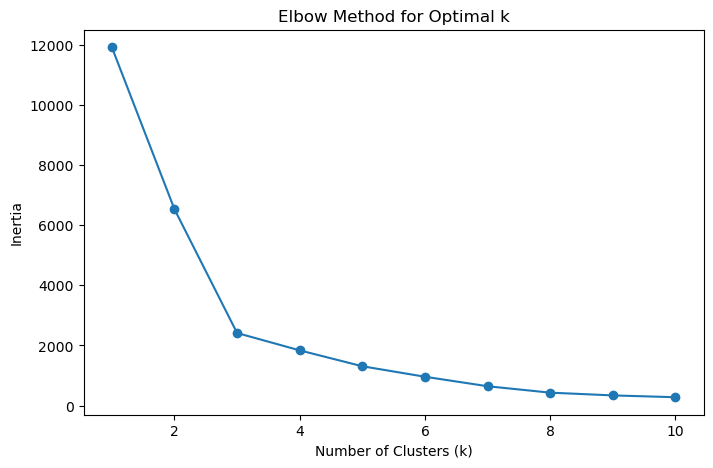

In [147]:
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()
# #Kim Anita 22B030380

In [148]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=3, random_state=42)
# clusters = kmeans.fit_predict(scaled_data)
# dataset['Cluster'] = clusters
# import matplotlib.pyplot as plt
# plt.scatter(dataset['length'], dataset['weight'], c=dataset['Cluster'], cmap='viridis')
# plt.xlabel('Length (cm)')
# plt.ylabel('Weight (g)')
# plt.title('K-Means Clustering of Fish Data')
# plt.colorbar(label='Cluster')
# plt.show()
# #Kim Anita 22B030380

Exercise 5: Implementing Hierarchical Clustering
Objective: Explore hierarchical clustering.
Tasks:
Apply Agglomerative Clustering to the same dataset used in K-Means.
Visualize the results using a dendrogram to illustrate the clustering hierarchy.
Compare the results with those from K-Means.

In [149]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=8)
clusters = agglomerative.fit_predict(scaled_data)
dataset['Agglomerative_Cluster'] = clusters
# #Kim Anita 22B030380

In [150]:
import matplotlib.pyplot as plt

plt.scatter(dataset['length'], dataset['weight'], c=dataset['Agglomerative_Cluster'], cmap='viridis')
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.title('Agglomerative Clustering of Fish Data')
plt.colorbar(label='Cluster')
plt.show()
#Kim Anita 22B030380

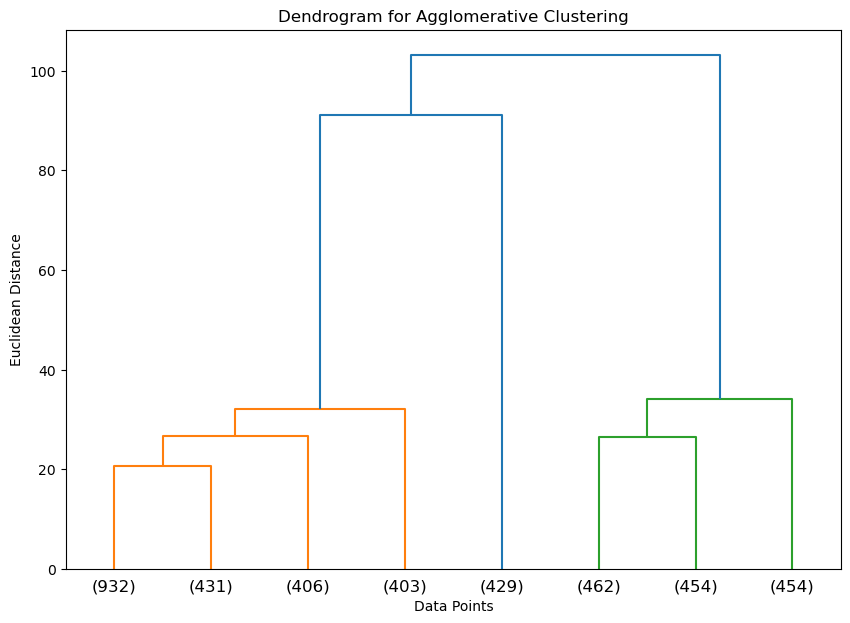

In [151]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True, truncate_mode="lastp", p=8)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()
# #Kim Anita 22B030380

Exercise 6: Introduction to DBSCAN
Objective: Understand density-based clustering.
Tasks:
Implement DBSCAN on the dataset and visualize the clusters.
Discuss the parameters (eps and min_samples) and their effect on clustering results.
Compare the performance of DBSCAN with K-Means.

In [152]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.13, min_samples=8)
dbscan_labels = dbscan.fit_predict(scaled_data)
dataset['DBSCAN_Cluster'] = dbscan_labels
# #Kim Anita 22B030380

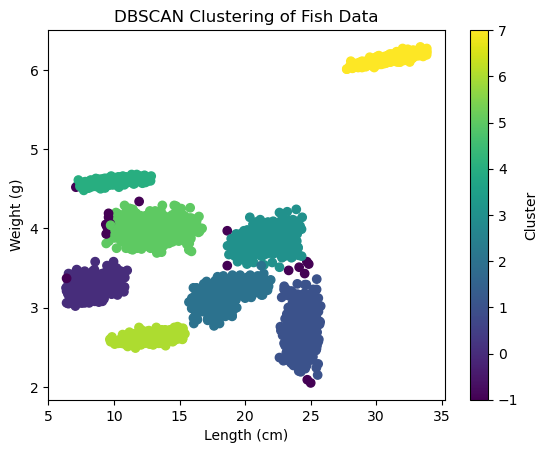

In [153]:
import matplotlib.pyplot as plt

plt.scatter(dataset['length'], dataset['weight'], c=dataset['DBSCAN_Cluster'], cmap='viridis', marker='o')
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.title('DBSCAN Clustering of Fish Data')
plt.colorbar(label='Cluster')
plt.show()
# #Kim Anita 22B030380

In [154]:
from sklearn.metrics import silhouette_score

kmeans_silhouette = silhouette_score(scaled_data, dataset['Cluster'])
agglomerative_silhouette = silhouette_score(scaled_data, dataset['Agglomerative_Cluster'])
dbscan_silhouette = silhouette_score(scaled_data, dataset['DBSCAN_Cluster'])

print("K-Means Silhouette Score:", kmeans_silhouette)
print("Agglomerative Clustering Silhouette Score:", agglomerative_silhouette)
print("DBSCAN Silhouette Score:", dbscan_silhouette)
# #Kim Anita 22B030380

K-Means Silhouette Score: 0.6488568249221344
Agglomerative Clustering Silhouette Score: 0.6510280037642099
DBSCAN Silhouette Score: 0.6492026695700902


In [155]:
from sklearn.metrics import calinski_harabasz_score

kmeans_ch_score = calinski_harabasz_score(scaled_data, dataset['Cluster'])
agglomerative_ch_score = calinski_harabasz_score(scaled_data, dataset['Agglomerative_Cluster'])
dbscan_ch_score = calinski_harabasz_score(scaled_data, dataset['DBSCAN_Cluster'])

print("K-Means Calinski-Harabasz Score:", kmeans_ch_score)
print("Agglomerative Clustering Calinski-Harabasz Score:", agglomerative_ch_score)
print("DBSCAN Calinski-Harabasz Score:", dbscan_ch_score)
# #Kim Anita 22B030380

K-Means Calinski-Harabasz Score: 16882.689609673344
Agglomerative Clustering Calinski-Harabasz Score: 14450.66249727973
DBSCAN Calinski-Harabasz Score: 11369.641175470108


In [156]:
from sklearn.metrics import davies_bouldin_score

kmeans_db_score = davies_bouldin_score(scaled_data, dataset['Cluster'])
agglomerative_db_score = davies_bouldin_score(scaled_data, dataset['Agglomerative_Cluster'])
dbscan_db_score = davies_bouldin_score(scaled_data, dataset['DBSCAN_Cluster'])

print("K-Means Davies-Bouldin Score:", kmeans_db_score)
print("Agglomerative Clustering Davies-Bouldin Score:", agglomerative_db_score)
print("DBSCAN Davies-Bouldin Score:", dbscan_db_score)
# #Kim Anita 22B030380

K-Means Davies-Bouldin Score: 0.4839704304747008
Agglomerative Clustering Davies-Bouldin Score: 0.4642326317823544
DBSCAN Davies-Bouldin Score: 1.8426159587575706
